In [16]:
%matplotlib inline

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [10]:
au_features = pd.read_csv('audio_features.csv')
au_features = au_features.drop(['label','index'], axis=1)
im_features = pd.read_csv('white_proportion_feature.csv')
features = pd.concat([au_features, im_features], axis=1)
features = features.drop(['index','audio_file','image_file','seconds_length'], axis=1)
features = features[features.length < 300]
features['variance_of_nonsilence_variances'].fillna(0, inplace=True)
features = features.dropna()

In [11]:
from sklearn import preprocessing
# See if we can distinguish voice mail clips from the others
features_1 = features[features.label == 1]
features_1 = features_1.drop('label', axis=1)
#features_1 = features_1[['length', 'last_ring_to_end_length', 'white_proportion']]
cluster_scaler = preprocessing.StandardScaler().fit(features_1)
scaled_features_1 = cluster_scaler.transform(features_1)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scaled_features_1)

# Look at cluster sizes
unique, counts = np.unique(labels, return_counts=True)
print(counts)

[5918 2505]


In [ ]:
# Look at images by cluster to see if they seem to make sense
au_features = pd.read_csv('audio_features.csv')
images = au_features[au_features.label == 1]['image_file']
clusters = [[] for _ in range(max(labels)+1)]
for label, img in zip(labels, images):
    img = img.replace('..', 'data')
    clusters[label].append(img)

for img in random.sample(clusters[1], 10):
    display(Image(filename=img, width=320))

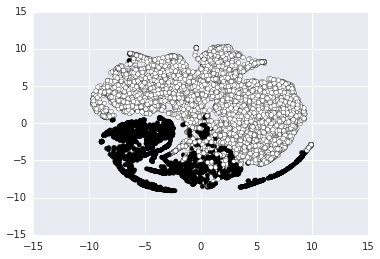

In [20]:
from sklearn.manifold import TSNE
# http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

X_tsne = TSNE(n_components=2, learning_rate=1000).fit_transform(scaled_features_1)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_scaled_features_1 = pca.fit_transform(scaled_features_1)
reduced_scaled_features_1.shape

(8423, 2)

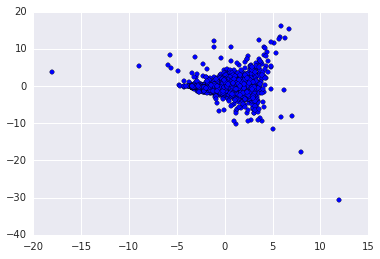

In [24]:
plt.scatter(reduced_scaled_features_1[:,0], reduced_scaled_features_1[:,1])